In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from PIL import Image

In [2]:
# rozklad matice
def create_u0(h,r):
    u0 = np.zeros([h,h])
    for i in range(h):
        for j in range(h):
            circle = (j-h/2)**2+(i-h/2)**2
            if circle<=r:
                u0[i][j]=1
    matrix = u0
    vector = np.reshape(u0,h**2)
    return [matrix,vector]
    
def DLR_decomposition(A):
    D = np.zeros([len(A),len(A)])
    L = np.zeros([len(A),len(A)])
    R = np.zeros([len(A),len(A)])
    invD = np.zeros([len(A),len(A)])
    for i in range(len(A)):
        for j in range(len(A)):
            if i == j:
                D[i][j] = A[i][j]
                invD[i][j] = 1/A[i][j]
            if i > j:
                L[i][j] = - A[i][j]
            if i < j:
                R[i][j] = - A[i][j]
    return [D,L,R,invD]


def SOR(A,b,iteration_count,omega):
    x = np.zeros(len(A))
    D,L,R,invD = DLR_decomposition(A)
    I = np.identity(len(A))
    
    for i in range(iteration_count):
        x = np.dot(I - omega * np.dot(np.linalg.inv(D - omega * L),A) , x) + omega * np.dot(np.linalg.inv(D - omega * L),b)
        
    return x

def euler_matrix(h,lamb):
    PM = np.zeros([h**2,h**2])
    for i in range(0,h):
        PM[i][i] = 1
    for i in range(h,h**2-h):
        if i%h==0:
            PM[i][i] = 1
        elif i%h==h-1:
            PM[i][i] = 1
        else:
            PM[i][i] = (1+4*lamb)
            PM[i][i-1] = -lamb
            PM[i][i+1] = -lamb
            PM[i][i-h] = -lamb
            PM[i][i+h] = -lamb
    for i in range(h**2-h,h**2):
        PM[i][i] = 1
    return PM

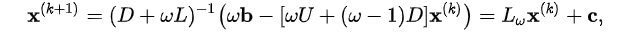

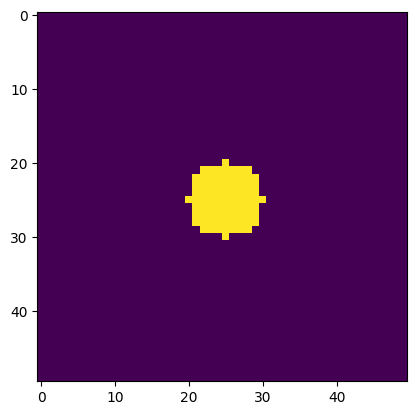

In [3]:
h = 50
lamb = 1
r = 25
A = euler_matrix(h,lamb)
b = create_u0(h,r)
plt.imshow(b[0])

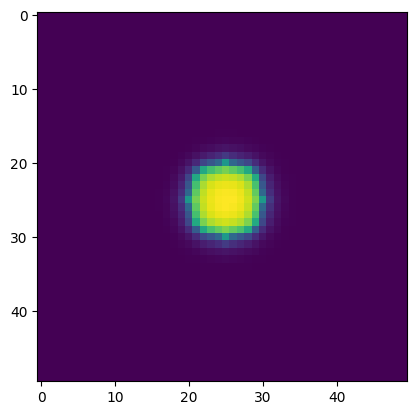

In [4]:
 plt.imshow(np.reshape(SOR(A,b[1],10,1),(h,h))) #stav systému po 10ti iterací SOR meto

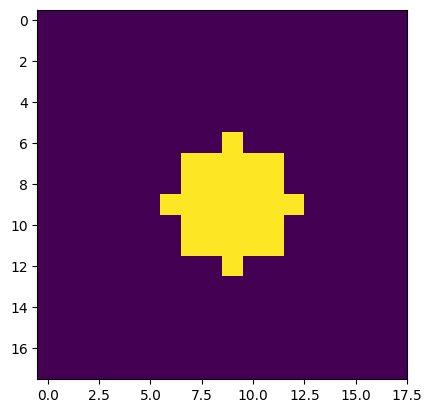

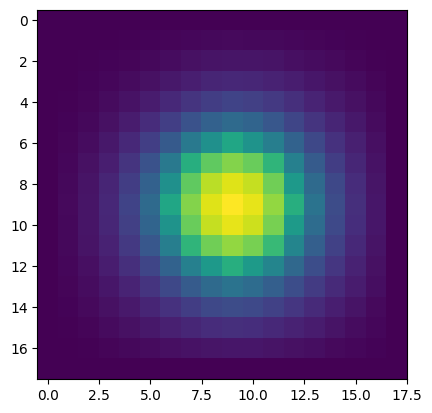

In [5]:
h = 18
lamb = 20
r = 9
A = euler_matrix(h,lamb)
b = create_u0(h,r)
plt.imshow(b[0])
plt.show()
plt.imshow(np.reshape(SOR(A,b[1],20,1),(h,h)))

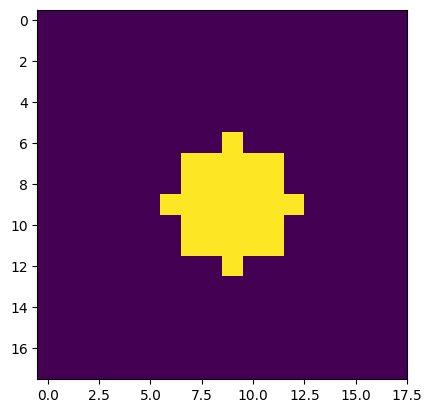

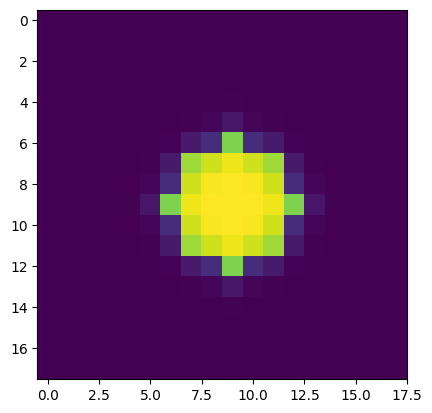

In [6]:
 #stav systému po 20ti iterací SOR metody s volbou lambda = 0.1
h = 18
lamb = 0.1
r = 9
A = euler_matrix(h,lamb)
b = create_u0(h,r)
plt.imshow(b[0])
plt.show()
plt.imshow(np.reshape(SOR(A,b[1],20,1),(h,h)))